# Homework Four

**Step 1:** 


Import the necessary modules (numpy, pandas, matplotlib.pyplot) and set jupyter to generate plots inline.

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Step 2:** 

Read in the iris data set and examine the head to make sure the data is in a usable format

In [29]:
irisdata = pd.read_csv('C:/Users/paigebiller/Documents/GitHub/HomeworkThree/iris.txt',\
                   sep=",", header = 0, names = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])

irisdata.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Step 3:** 

Create a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns

In [30]:
reducediris = irisdata.drop(irisdata.columns[[0, 1, 4]], axis=1) #axis=1 represents columns, axis=0 would mean rows

reducediris.head()

,Petal Length,Petal Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


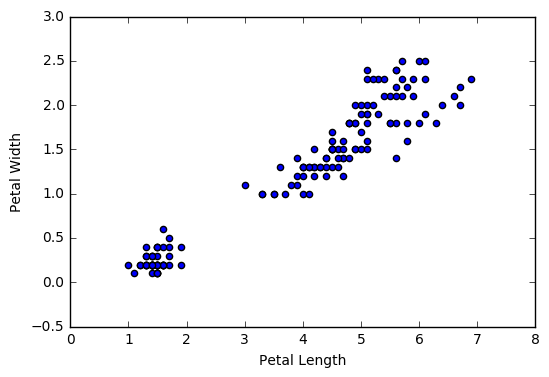

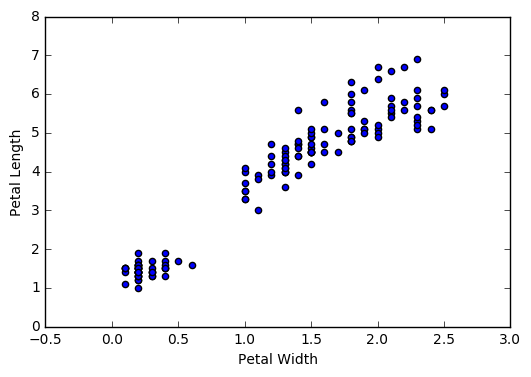

In [31]:
reducediris.plot(kind='scatter', x='Petal Length', y='Petal Width');
reducediris.plot(kind='scatter', x='Petal Width', y='Petal Length');

In [32]:
xvar = reducediris['Petal Length'].values

In [33]:
unitxarray = np.repeat(1,150)

In [34]:
yvar = reducediris['Petal Width'].values

In [35]:
xmatrix = np.column_stack((unitxarray,xvar))
print(xmatrix)

[[ 1.   1.4]
 [ 1.   1.4]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   1.4]
 [ 1.   1.7]
 [ 1.   1.4]
 [ 1.   1.5]
 [ 1.   1.4]
 [ 1.   1.5]
 [ 1.   1.5]
 [ 1.   1.6]
 [ 1.   1.4]
 [ 1.   1.1]
 [ 1.   1.2]
 [ 1.   1.5]
 [ 1.   1.3]
 [ 1.   1.4]
 [ 1.   1.7]
 [ 1.   1.5]
 [ 1.   1.7]
 [ 1.   1.5]
 [ 1.   1. ]
 [ 1.   1.7]
 [ 1.   1.9]
 [ 1.   1.6]
 [ 1.   1.6]
 [ 1.   1.5]
 [ 1.   1.4]
 [ 1.   1.6]
 [ 1.   1.6]
 [ 1.   1.5]
 [ 1.   1.5]
 [ 1.   1.4]
 [ 1.   1.5]
 [ 1.   1.2]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   1.3]
 [ 1.   1.3]
 [ 1.   1.3]
 [ 1.   1.6]
 [ 1.   1.9]
 [ 1.   1.4]
 [ 1.   1.6]
 [ 1.   1.4]
 [ 1.   1.5]
 [ 1.   1.4]
 [ 1.   4.7]
 [ 1.   4.5]
 [ 1.   4.9]
 [ 1.   4. ]
 [ 1.   4.6]
 [ 1.   4.5]
 [ 1.   4.7]
 [ 1.   3.3]
 [ 1.   4.6]
 [ 1.   3.9]
 [ 1.   3.5]
 [ 1.   4.2]
 [ 1.   4. ]
 [ 1.   4.7]
 [ 1.   3.6]
 [ 1.   4.4]
 [ 1.   4.5]
 [ 1.   4.1]
 [ 1.   4.5]
 [ 1.   3.9]
 [ 1.   4.8]
 [ 1.   4. ]
 [ 1.   4.9]
 [ 1.   4.7]
 [ 1.   4.3]
 [ 1.   4.4]
 [ 1.   4.8]

In [36]:
def betacalc(indepvar,depvar):
    beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(indepvar),indepvar)),np.transpose(indepvar)),depvar)
    return beta

In [37]:
betaarray=betacalc(xmatrix,yvar)

print(betaarray)

[-0.36651405  0.41641913]


In [38]:
def scoreregress(datapointx):
    predictvar= betaarray[0]+betaarray[1]*datapointx
    return predictvar

predictarray=scoreregress(1.4)

print(predictarray)

0.216472739983


In [39]:
expected_Petal_Width = np.array([0,0])
  
for i in reducediris['Petal Length']:
    expected_value = scoreregress(i)
    expected_Petal_Width = np.vstack([expected_Petal_Width, [i, expected_value]])

#delete the first observation in the array that we created to initialize
expected_Petal_Width = np.delete(expected_Petal_Width, 0, 0)

expected_Petal_Width

array([[ 1.4       ,  0.21647274],
       [ 1.4       ,  0.21647274],
       [ 1.3       ,  0.17483083],
       [ 1.5       ,  0.25811465],
       [ 1.4       ,  0.21647274],
       [ 1.7       ,  0.34139848],
       [ 1.4       ,  0.21647274],
       [ 1.5       ,  0.25811465],
       [ 1.4       ,  0.21647274],
       [ 1.5       ,  0.25811465],
       [ 1.5       ,  0.25811465],
       [ 1.6       ,  0.29975657],
       [ 1.4       ,  0.21647274],
       [ 1.1       ,  0.091547  ],
       [ 1.2       ,  0.13318891],
       [ 1.5       ,  0.25811465],
       [ 1.3       ,  0.17483083],
       [ 1.4       ,  0.21647274],
       [ 1.7       ,  0.34139848],
       [ 1.5       ,  0.25811465],
       [ 1.7       ,  0.34139848],
       [ 1.5       ,  0.25811465],
       [ 1.        ,  0.04990509],
       [ 1.7       ,  0.34139848],
       [ 1.9       ,  0.42468231],
       [ 1.6       ,  0.29975657],
       [ 1.6       ,  0.29975657],
       [ 1.5       ,  0.25811465],
       [ 1.4       ,

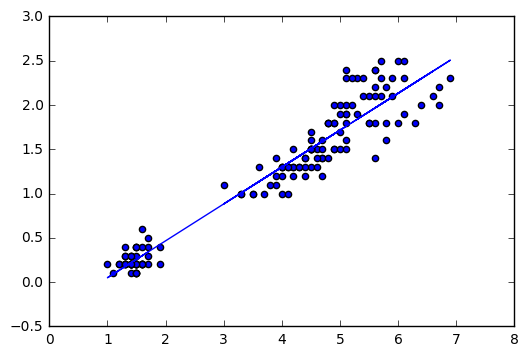

In [40]:
#Change from Numpy array into DataFrame
data = pd.DataFrame(data = expected_Petal_Width[0:,0:])
#Remove duplicate rows
data = data.drop_duplicates()

#creat scatter plot with regression line fitted on top
plt.scatter(reducediris['Petal Length'], reducediris['Petal Width'])
plt.plot(data[0],data[1])
plt.show()